In [5]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as pl
import my

In [2]:
#
# Load the data
#

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1, 28, 28,1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [3]:
autoencoder = keras.models.load_model('./3_deep_conv_autoencoder.model/')

In [4]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 8)          

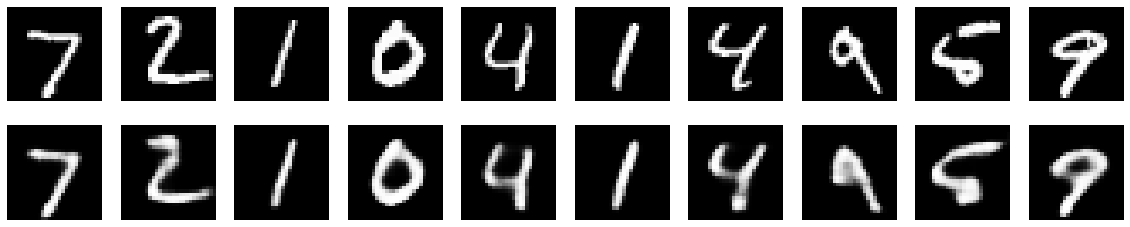

In [6]:
my.plot_reconstruction(autoencoder, x_test, 10)

In [23]:
#
# Add noise to x_test
#

noise = np.random.normal(size=x_test.shape) * 0.7
x_test_noisy = np.clip(x_test + noise, 0, 1)

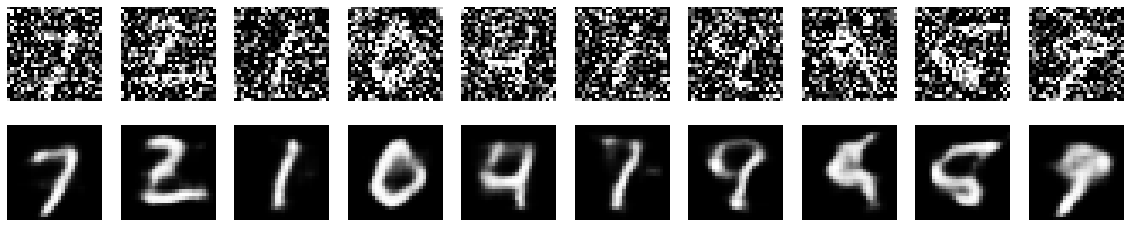

In [24]:
my.plot_reconstruction(autoencoder, x_test_noisy, 10)

# Fine Tuning of autoencoding with noise

In [18]:
#
# Add noise to x_train
#

noise = np.random.normal(size=x_train.shape) * 0.5
x_train_noisy = np.clip(x_train + noise, 0, 1)

In [19]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 16s 32ms/step - loss: 0.1512
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1368
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1336
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1310
Epoch 5/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1292
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1279
Epoch 7/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1270
Epoch 8/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1263
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1256
Epoch 10/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1252


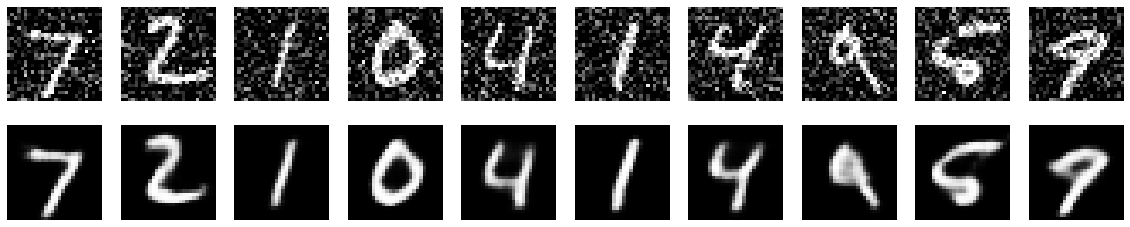

In [20]:
my.plot_reconstruction(autoencoder, x_test_noisy, 10)